Reminder: 


Key question:

- "How do annual members and casual riders use Cyclistic bikes differently?"

Task:

- Finding differences between casual riders and annual members as well as how they are using bikes.

Imports

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Importing data prepared by process notebook

In [104]:
df = pd.read_parquet("data/preprocessed/dataset.parquet")

In [105]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,is_member,duration,distance,started_time,week_day,month,day_of_year,day
index,,,,,,,,,,,,,,,
0,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,False,2.950000,699.546753,12.000000,3,1,13,13
1,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,False,4.350000,694.321716,8.695312,0,1,10,10
2,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,True,4.350000,1000.832275,4.894531,1,1,25,25
3,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,False,14.933333,2462.779297,0.301025,1,1,4,4
4,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,True,6.033333,814.537720,1.519531,3,1,20,20


Define functions

In [106]:
def plot_dwo_bars(first_data, second_data, labels, colors, plotText, subText1, subText2):
    
    first_data = first_data /sum(first_data)
    second_data = second_data /sum(second_data)

    fig = plt.figure(figsize = (15,5))
    ax = fig.add_subplot(1,1,1)

    ind = np.arange(len(labels))
    width = 0.35 

    rects1 = ax.bar(ind, first_data, width, color=colors[0])

    rects2 = ax.bar(ind+width, second_data, width, color=colors[1])

    ax.set_ylabel('Percent')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels( labels)
    ax.legend( (rects1[0], rects2[0]), (subText1, subText2) )
    fig.text(0.5, 1.01, plotText, ha='center', fontsize = 18)

In [107]:
percent_of_members = round(sum(df["is_member"]==True) / len(df),2)
print(f"Members' rides percent: {percent_of_members*100}\nCasuals' rides percent: {round(1-percent_of_members,2)*100}")

Members' rides percent: 60.0
Casuals' rides percent: 40.0


Comparison of rideable types

rideable_type
classic_bike     0.655709
docked_bike      0.000000
electric_bike    0.344291
Name: started_at, dtype: float64
rideable_type
classic_bike     0.505812
docked_bike      0.099834
electric_bike    0.394354
Name: started_at, dtype: float64


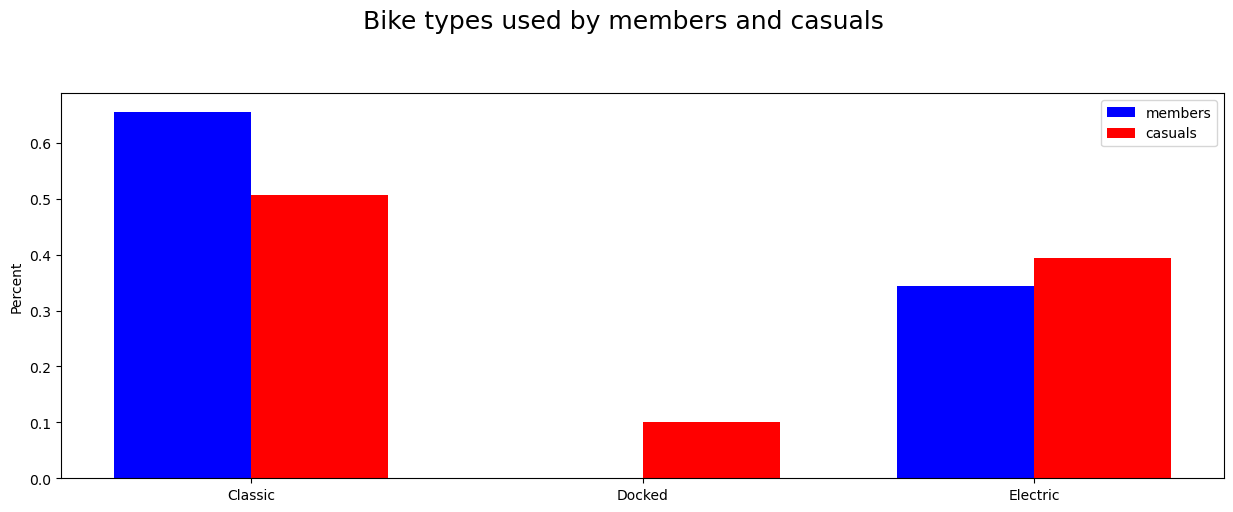

In [108]:
grouped = df.groupby(by=["is_member","rideable_type"])["started_at"].count()

print(grouped[True] /sum(grouped[True]))
print(grouped[False] /sum(grouped[False]))

plot_dwo_bars(grouped[True].values,grouped[False].values,["Classic","Docked","Electric"],['blue','red'], "Bike types used by members and casuals", "members", "casuals")

Average duration of ride

In [109]:
grouped = df.groupby(by=["is_member"])["duration"].mean()
print("Average ride duration:")
print(f"Members: {round(grouped[True])} minutes")
print(f"Casuals: {round(grouped[False])} minutes")

Average ride duration:
Members: 13 minutes
Casuals: 24 minutes


Average distance of ride (distance between start point and end point)

In [110]:
grouped = df.groupby(by=["is_member"])["distance"].mean()
print("Average ride distance: (distance between start point and end point)")
print(f"Members: {round(grouped[True])} meters")
print(f"Casuals: {round(grouped[False])} meters")

Average ride distance: (distance between start point and end point)
Members: 2090 meters
Casuals: 2181 meters


Stations analysis

In [111]:
grouped = df.groupby(by=["start_station_name","is_member"]).agg({"started_at": ['count']})["started_at"]["count"]
grouped_stations = pd.DataFrame(index=grouped.index.get_level_values(0).unique(),data=zip(grouped[:,True].values,grouped[:,False].values),columns=["members","casuals"])

List of most used stations as a start station

In [112]:
grouped_stations.sort_values("members",ascending=False).head(10)

,members,casuals
start_station_name,,
Kingsbury St & Kinzie St,23266,8034
Clark St & Elm St,20315,11881
Wells St & Concord Ln,19457,14721
Clinton St & Washington Blvd,18626,5289
Loomis St & Lexington St,17970,2770
Clinton St & Madison St,17821,6657
University Ave & 57th St,17331,4889
Wells St & Elm St,17318,11405
Ellis Ave & 60th St,17277,4173


In [113]:
grouped_stations.sort_values("casuals",ascending=False).head(10)

,members,casuals
start_station_name,,
Streeter Dr & Grand Ave,15963,54544
DuSable Lake Shore Dr & Monroe St,8857,30000
Millennium Park,8780,23751
Michigan Ave & Oak St,13294,23569
DuSable Lake Shore Dr & North Blvd,15340,21970
Shedd Aquarium,4531,19261
Theater on the Lake,13774,17220
Wells St & Concord Ln,19457,14721
Dusable Harbor,4923,13175


List of most used stations as an end station

In [114]:
grouped = df.groupby(by=["end_station_name","is_member"]).agg({"started_at": ['count']})["started_at"]["count"]
grouped_stations = pd.DataFrame(index=grouped.index.get_level_values(0).unique(),data=zip(grouped[:,True].values,grouped[:,False].values),columns=["members","casuals"])

In [115]:
grouped_stations.sort_values("members",ascending=False).head(10)

,members,casuals
end_station_name,,
Kingsbury St & Kinzie St,22956,7181
Clark St & Elm St,20660,11235
Wells St & Concord Ln,20056,14303
Clinton St & Washington Blvd,19294,4610
Clinton St & Madison St,18334,6465
University Ave & 57th St,18189,4941
Loomis St & Lexington St,17783,2653
Wells St & Elm St,17289,10801
Ellis Ave & 60th St,17092,4238


In [116]:
grouped_stations.sort_values("casuals",ascending=False).head(10)

,members,casuals
end_station_name,,
Streeter Dr & Grand Ave,14485,57296
DuSable Lake Shore Dr & Monroe St,9825,28281
Millennium Park,7911,25478
Michigan Ave & Oak St,12753,25181
DuSable Lake Shore Dr & North Blvd,15057,25119
Theater on the Lake,12848,18536
Shedd Aquarium,5181,17887
Wells St & Concord Ln,20056,14303
Clark St & Armitage Ave,13917,12935


Analysis of what hours members and casuals use bikes

In [117]:
df = pd.read_parquet("data/preprocessed/dataset.parquet")

In [118]:
bins=24
colors = ["blue","red"]

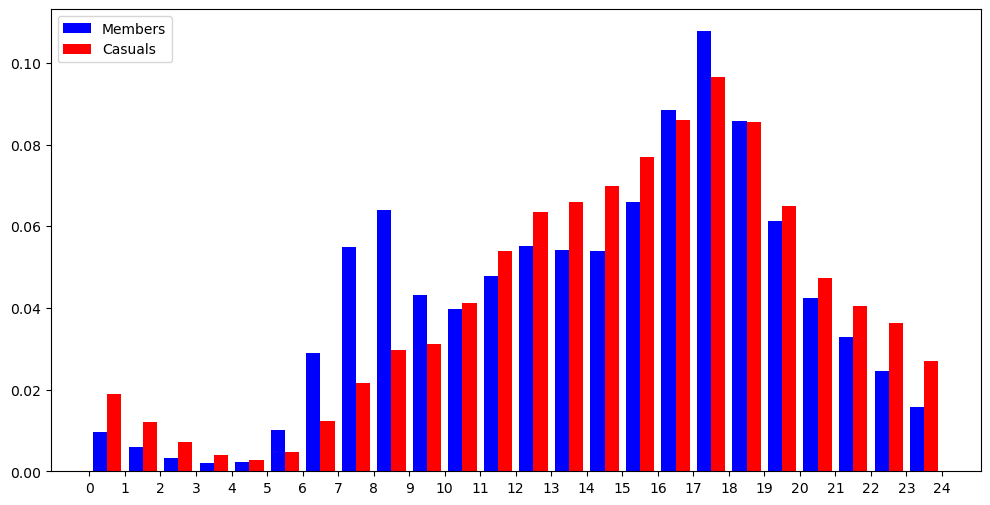

In [119]:
plt.figure(figsize=(12,6))
m = df.query("is_member == True" )["started_time"]
c = df.query("is_member == False" )["started_time"]
plt.hist([m,c],bins=bins,color=colors, weights=[np.ones(len(m)) / len(m),np.ones(len(c)) / len(c)],label=['Members','Casuals'])
plt.legend(loc='upper left')
plt.xticks(range(0,25))
plt.show()

Analysis of what day of the week members and casuals use bikes

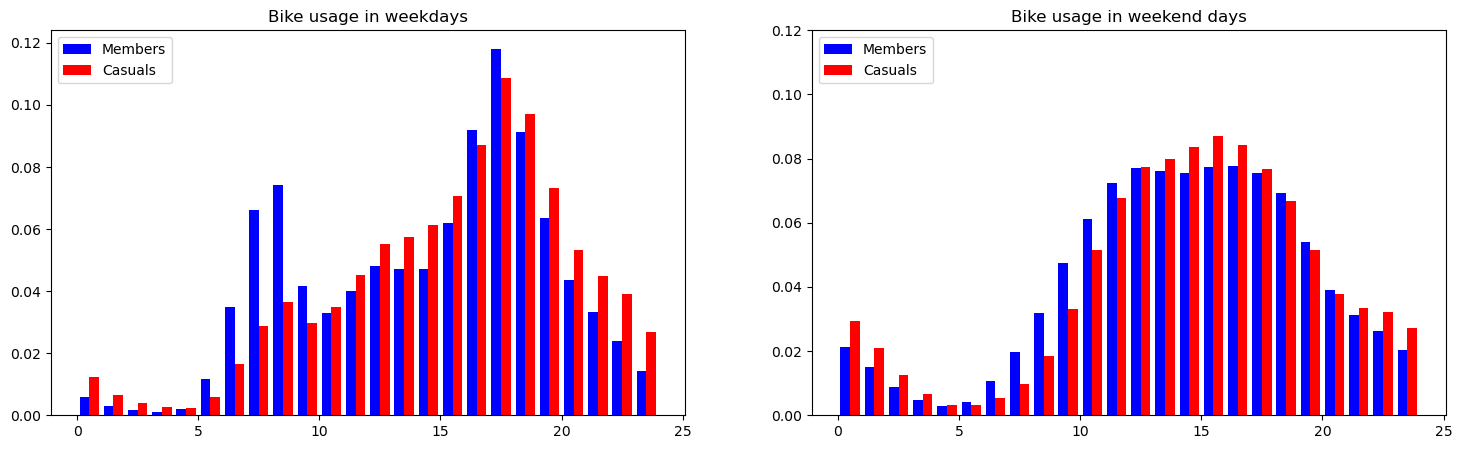

In [120]:
week_df = df.query("week_day not in [5,6]" )
weekend_df = df.query("week_day in [5,6]" )
fig = plt.figure(figsize=(18,5))
axis = fig.subplots(1,2)
m = week_df.query("is_member == True" )["started_time"]
c = week_df.query("is_member == False" )["started_time"]
axis[0].hist([m,c],bins=bins,color=colors, weights=[np.ones(len(m)) / len(m),np.ones(len(c)) / len(c)],label=['Members','Casuals'])
axis[0].legend(loc='upper left')
axis[0].set_title("Bike usage in weekdays")
axis[0].set_yticks(np.arange(0,0.13,0.02))

m = weekend_df.query("is_member == True" )["started_time"]
c = weekend_df.query("is_member == False" )["started_time"]
axis[1].hist([m,c],bins=bins,color=colors, weights=[np.ones(len(m)) / len(m),np.ones(len(c)) / len(c)],label=['Members','Casuals'])
axis[1].legend(loc='upper left')
axis[1].set_title("Bike usage in weekend days")
axis[1].set_yticks(np.arange(0,0.13,0.02))

plt.show()

Analysis how members and casuals use bikes differently divided into months

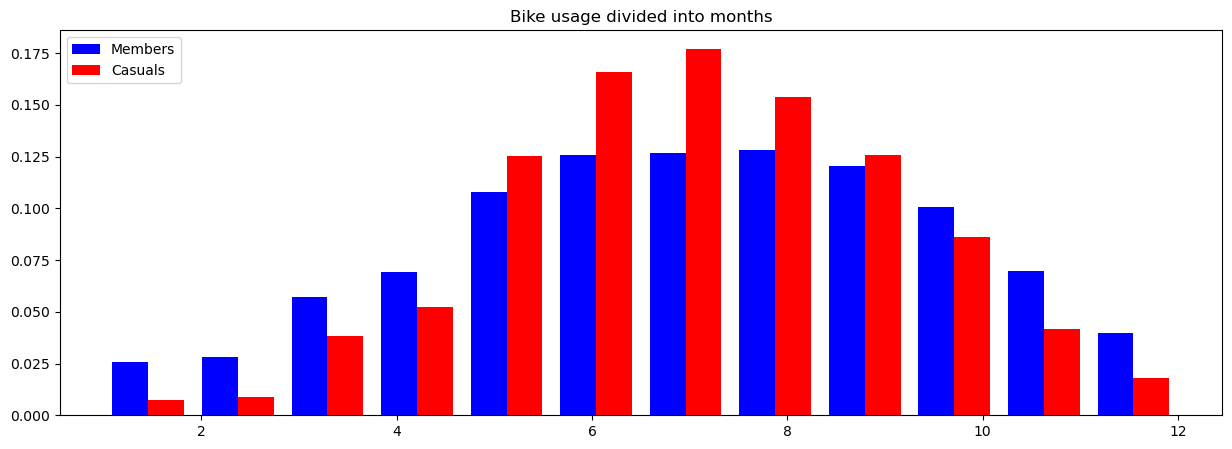

In [121]:
plt.figure(figsize=(15,5))
m = df.query("is_member == True" )["month"]
c = df.query("is_member == False" )["month"]
plt.hist([m,c],bins=12,color=colors, weights=[np.ones(len(m)) / len(m),np.ones(len(c)) / len(c)],label=['Members','Casuals'])
plt.legend(loc='upper left')
plt.title("Bike usage divided into months")
plt.show()

Second approach

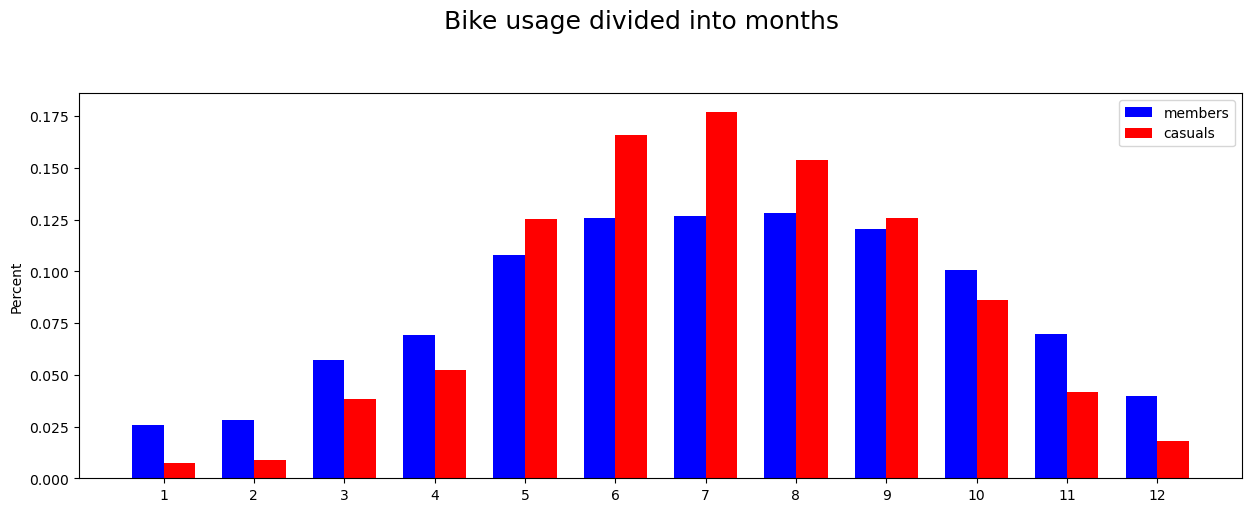

In [122]:
grouped = df.groupby(by=["is_member","month"])["started_at"].count()
plot_dwo_bars(grouped[True].values,grouped[False].values,[str(i) for i in range(1,13)],colors, "Bike usage divided into months", "members", "casuals")

Summary

1. Bike type
    - members use evenly classic bikes (65%) and electric bikes (35%). They are not using docked bikes.
    - casuals use mostly classic bikes (50%) and fewer electric bikes (39%). 10% of their rides were on docked bikes.
2. Average duration of the ride
    - members' average ride takes 13 minutes
    - casuals' average ride takes 24 minutes
3. Average distance of ride (distance between the start point and the end point)
    - members' average ride distance is 2,09 km
    - casuals' average ride distance is 2,18 km
4. Stations 
    - members start mostly at stations: Kingsbury St & Kinzie St; Clark St & Elm St; Wells St & Concord Ln
    - casuals start mostly at stations: Streeter Dr & Grand Ave; DuSable Lake Shore Dr & Monroe St; Millennium Park
5. Hours of bike use
    - members ride more than casuals between 5 am and 10 am, and slightly more between 5 pm and 6 pm
    - casuals ride more than casuals between 7 pm and 4 am, and slightly more between 12 am and 3 pm
6. Day of the week
    - members lead between 5 am and 10 am is more significant on weekdays
    - casuals lead between 12 pm and 4 am is more significant on weekend days
7. Months
    - members use bikes in every season, mostly in summer 
    - casuals use bikes less often in winter than members, but there are more casual rides in summer than member rides.